Check [pytesseract](https://pypi.org/project/pytesseract/).

In [13]:
from pytesseract import *
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [28]:
path = os.path.join(os.getcwd(), '../sample1')
imgs = os.listdir(path)[:5]
filename = 'UCD_Lehmann_0007.jpg'
#filename = "../no_noise_UCD_Lehmann_1287.jpg"

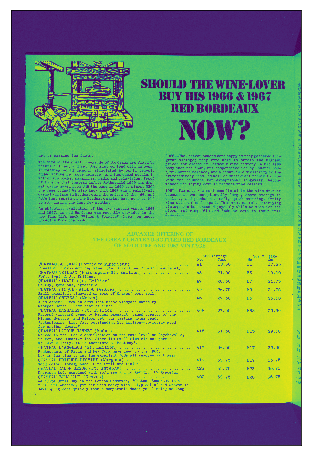

In [29]:
plt.figure(figsize=(10,8))
img = cv2.imread(os.path.join(path, filename))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img2 = cv2.Laplacian(img, cv2.CV_64F)
#plt.imshow(img2)
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.show()

# cv2.imshow("sample", img)
# cv2.waitKey(0)
# cv2.destropyAllWindows()

In [21]:
out = image_to_data(img)
print(out)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2100	3100	-1	
2	1	1	0	0	0	231	570	327	112	-1	
3	1	1	1	0	0	231	570	327	112	-1	
4	1	1	1	1	0	367	570	191	27	-1	
5	1	1	1	1	1	367	570	191	27	89	HENNESSY
4	1	1	1	2	0	231	611	327	29	-1	
5	1	1	1	2	1	231	614	77	26	93	FINE
5	1	1	1	2	2	330	611	228	29	88	CHAMPAGNE
4	1	1	1	3	0	249	653	309	29	-1	
5	1	1	1	3	1	249	655	133	27	90	V.S.O.P.
5	1	1	1	3	2	403	653	155	28	89	COGNAC
2	1	2	0	0	0	275	712	284	703	-1	
3	1	2	1	0	0	275	712	284	703	-1	
4	1	2	1	1	0	409	712	149	26	-1	
5	1	2	1	1	1	409	714	121	24	86	Hennessy
5	1	2	1	1	2	540	712	18	21	89	is
4	1	2	1	2	0	342	739	215	27	-1	
5	1	2	1	2	1	342	745	156	21	87	synonymous
5	1	2	1	2	2	517	739	40	21	68	vith
4	1	2	1	3	0	325	767	233	26	-1	
5	1	2	1	3	1	325	768	95	25	90	Cognac
5	1	2	1	3	2	430	768	34	20	86	tor
5	1	2	1	3	3	473	767	85	25	83	brandy
4	1	2	1	4	0	312	794	245	22	-1	
5	1	2	1	4	1	312	795	102	21	74	drinkers
5	1	2	1	4	2	423	795	87	20	87	around
5	1	2	1	4	3	520	794	37	20	8

In [30]:
out1 = out.replace('\t',',')
with open('3896.csv',"w") as f:
    f.write(out1)

In [4]:
out = image_to_string(img)
print(out)

A Library of Rare Old CLARETS

T heir Sheer
Existance Marks

an Historic
Wine Event

No. Bottle Case

5028 CHATEAU PICHON LONGUEVILLE
LALANDE [Pauillac] .................. 6.99 75.50

Our comparative tastings indicate Clearly that this extraordinary
1955 claret, enhanced by a decade of bottle age, is one of the
noblest claret experiences presently available. Pichon is a vine-
yard adjacent to Chateau Latour and has much of its nobility.
Acquiring a wine of this age and stature at 6.99 marks an historic
wine opportunity.

5081 CHATEAU COS D’ESTOURNEL

(St. Estephe) ........................ 7.95 85.85
5078 CHATEAU LEOVILLE LASCASES

(St. Iulien] ........................... 7.99 86.30
5088 CARRUADES DE LAFITE ROTHSCHILD

(Pauillac) ............................ 8.95 96.65
832 CHATEAU LA MISSION HAUT BRION

(Graves) .............................. 10.95 118.20

5082 CHATEAU LATOUR (Pauillac) ......... 17.50 189.00
5084 CHATEAU HAUT BRION (Graves) ...... 19.95 215.45
5038 CHATEAU CHEVAL BLANC

In [31]:
df = pd.read_csv('no_noise.csv',sep=',', error_bad_lines=False, engine="python")

Skipping line 490: unexpected end of data
Skipping line 55: Expected 12 fields in line 55, saw 13
Skipping line 73: Expected 12 fields in line 73, saw 13
Skipping line 100: Expected 12 fields in line 100, saw 13
Skipping line 107: Expected 12 fields in line 107, saw 13
Skipping line 154: Expected 12 fields in line 154, saw 13
Skipping line 176: Expected 12 fields in line 176, saw 13
Skipping line 177: Expected 12 fields in line 177, saw 13
Skipping line 192: Expected 12 fields in line 192, saw 13
Skipping line 197: Expected 12 fields in line 197, saw 13
Skipping line 214: Expected 12 fields in line 214, saw 13
Skipping line 252: Expected 12 fields in line 252, saw 13
Skipping line 286: Expected 12 fields in line 286, saw 13
Skipping line 304: Expected 12 fields in line 304, saw 13
Skipping line 322: Expected 12 fields in line 322, saw 13
Skipping line 411: Expected 12 fields in line 411, saw 13
Skipping line 417: Expected 12 fields in line 417, saw 13
Skipping line 465: Expected 12 fie

In [32]:
df = df[df.text.notnull()].reset_index(drop=True)
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,367,570,191,27,89,HENNESSY
1,5,1,1,1,2,1,231,614,77,26,93,FINE
2,5,1,1,1,2,2,330,611,228,29,88,CHAMPAGNE
3,5,1,1,1,3,1,249,655,133,27,90,V.S.O.P.
4,5,1,1,1,3,2,403,653,155,28,89,COGNAC
5,5,1,2,1,1,1,409,714,121,24,86,Hennessy
6,5,1,2,1,1,2,540,712,18,21,89,is
7,5,1,2,1,2,1,342,745,156,21,87,synonymous
8,5,1,2,1,2,2,517,739,40,21,68,vith
9,5,1,2,1,3,1,325,768,95,25,90,Cognac


In [14]:
df1 = df.text.apply(lambda x:bool(re.match(r"\d+\.\d{2}",x)), 1)
df1 = df[df1].reset_index()
df1 = df1.rename(columns = {'index':'old_index'})
df1['begin'] = 0
df1.head(10)

,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,320,5,1,13,2,1,7,2854,3487,172,41,87,18.50,0
1,322,5,1,13,2,1,9,3548,3489,171,40,86,17.25,0
2,337,5,1,13,2,3,7,2852,3604,174,41,91,21.00,0
3,339,5,1,13,2,3,9,3547,3605,171,41,86,19.00,0
4,352,5,1,13,2,5,7,2851,3719,174,42,82,26.50,0
5,354,5,1,13,2,5,9,3545,3721,172,41,77,24.75,0
6,363,5,1,13,3,1,7,2851,3836,173,41,83,26.75,0
7,365,5,1,13,3,1,9,3545,3838,173,40,83,24.75,0
8,382,5,1,13,3,3,6,2851,3953,174,42,89,27.50,0
9,384,5,1,13,3,3,8,3546,3954,172,41,90,25.50,0


In [125]:
df2 = df.text.apply(lambda x:bool(re.match(r"[0-9]+$",x)), 1)
df2 = df[df2].reset_index()
df2 = df2.rename(columns = {'index':'old_index'})
df2['begin'] = 1
df2.head(10)

,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,2,5,1,2,1,1,1,438,1163,148,51,89,1977,1
1,51,5,1,4,1,3,1,450,1595,60,33,90,533,1
2,69,5,1,4,1,6,1,450,1752,61,32,89,697,1
3,93,5,1,5,2,1,1,450,1905,62,33,88,298,1
4,112,5,1,6,1,1,1,451,2056,80,31,89,1020,1
5,154,5,1,8,2,1,1,455,2361,55,32,88,174,1
6,170,5,1,8,3,1,1,453,2468,61,32,90,979,1
7,209,5,1,10,1,1,1,453,2674,59,32,85,523,1
8,226,5,1,11,1,1,1,454,2782,59,32,88,233,1
9,240,5,1,11,2,2,7,1732,2871,42,33,85,60,1


In [126]:
df3 = pd.concat([df1,df2]).sort_values('old_index')
df3.head(10)

,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,2,5,1,2,1,1,1,438,1163,148,51,89,1977,1
1,51,5,1,4,1,3,1,450,1595,60,33,90,533,1
0,57,5,1,4,1,4,3,1431,1632,78,32,98,6.49,0
1,58,5,1,4,1,4,4,1640,1630,79,32,88,5.59,0
2,59,5,1,4,1,4,5,1824,1627,99,33,89,64.75,0
2,69,5,1,4,1,6,1,450,1752,61,32,89,697,1
3,74,5,1,4,1,6,6,1432,1740,78,33,89,6.99,0
4,75,5,1,4,1,6,7,1641,1738,79,33,89,5.99,0
5,76,5,1,4,1,6,8,1825,1736,100,32,87,69.90,0
3,93,5,1,5,2,1,1,450,1905,62,33,88,298,1


In [129]:
df[69:].head(50)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
69,5,1,4,1,6,1,450,1752,61,32,89,697
70,5,1,4,1,6,2,577,1747,213,34,83,CHATEAU
71,5,1,4,1,6,3,809,1745,204,33,83,GREYSAC
72,5,1,4,1,6,4,1034,1742,149,39,89,(Medoc)
73,5,1,4,1,6,5,1211,1767,160,7,89,........
74,5,1,4,1,6,6,1432,1740,78,33,89,6.99
75,5,1,4,1,6,7,1641,1738,79,33,89,5.99
76,5,1,4,1,6,8,1825,1736,100,32,87,69.90
77,5,1,5,1,1,1,577,1798,205,40,89,Proprietors
78,5,1,5,1,1,2,793,1805,56,21,90,are


In [138]:
# merge some rows based on the same block_num, ...
res = []
for i in range(len(df1)):
    if df3.iloc[i].begin == 1 and df3.iloc[i+1].begin == 0:
        print()
        print("start at:", df3.iloc[i]['old_index'], df3.iloc[i].text)
        tmp = [df3.iloc[i].text]
        start = i
        end = i + 1
        while df3.iloc[end].begin == 0:
            tmp.append(df3.iloc[end].text)
            end += 1
        print("end at:", df3.iloc[end-1]['old_index'])
        s = ''
        for k in range(int(df3.iloc[i]['old_index'])+1, int(df3.iloc[i+1]['old_index'])):
            print(k, df.iloc[k].text)
            s += ' ' + df.iloc[k].text
        print(s)
        s = s.rstrip(' .')
        tmp.append(s)
        s = ''
        for k in range(int(df3.iloc[end-1]['old_index'])+1, int(df3.iloc[end]['old_index'])):
            s += ' ' + df.iloc[k].text 
        print(s)
        s = s.rstrip(' .')
        tmp.append(s)
        res.append(tmp)
print(res)
        
        


start at: 51 533
end at: 59
52 CHATEAU
53 LAROSE
54 TRINTAUDON
55 (Haut-Medoc)
56 ........................
 CHATEAU LAROSE TRINTAUDON (Haut-Medoc) ........................
 Few N.Y. French restaurants do not feature this wine.

start at: 69 697
end at: 76
70 CHATEAU
71 GREYSAC
72 (Medoc)
73 ........
 CHATEAU GREYSAC (Medoc) ........
 Proprietors are Baron Francois de Cunzburg and M. Agnelli of Fiat. Wine reflects their ‘know how’.

start at: 93 298
end at: 101
94 CHAT.
95 HAUT
96 BEYCHEVELLE
97 GLORIA
98 ............................
 CHAT. HAUT BEYCHEVELLE GLORIA ............................
 Yes! It is a superb St. Julien from Chateau Gloria.

start at: 112 1020
end at: 120
113 CHATEAU
114 LAFON-ROCHET
115 (St.
116 Estephe)
117 .........................
 CHATEAU LAFON-ROCHET (St. Estephe) .........................
 Only a tiny lane separates the vines of Lafon-Rochet from Lafite-Roths- child. Some of the vines from Lafite overflow into St. Estephe. Like you will find sufficient tanni

In [140]:
import numpy as np
res_df = pd.DataFrame(np.array(res))

In [141]:
res_df.head()

,0,1,2,3,4,5
0,533,6.49,5.59,64.75,CHATEAU LAROSE TRINTAUDON (Haut-Medoc),Few N.Y. French restaurants do not feature th...
1,697,6.99,5.99,69.90,CHATEAU GREYSAC (Medoc),Proprietors are Baron Francois de Cunzburg an...
2,298,10.00,5.99,69.90,CHAT. HAUT BEYCHEVELLE GLORIA,Yes! It is a superb St. Julien from Chateau G...
3,1020,9.95,7.99,92.75,CHATEAU LAFON-ROCHET (St. Estephe),Only a tiny lane separates the vines of Lafon...
4,174,10.99,7.69,89.50,CHATEAU LASCOMBES (Margaux),elegance and balance. What a winel


In [142]:
res

[['533',
  '6.49',
  '5.59',
  '64.75',
  ' CHATEAU LAROSE TRINTAUDON (Haut-Medoc)',
  ' Few N.Y. French restaurants do not feature this wine'],
 ['697',
  '6.99',
  '5.99',
  '69.90',
  ' CHATEAU GREYSAC (Medoc)',
  ' Proprietors are Baron Francois de Cunzburg and M. Agnelli of Fiat. Wine reflects their ‘know how’'],
 ['298',
  '10.00',
  '5.99',
  '69.90',
  ' CHAT. HAUT BEYCHEVELLE GLORIA',
  ' Yes! It is a superb St. Julien from Chateau Gloria'],
 ['1020',
  '9.95',
  '7.99',
  '92.75',
  ' CHATEAU LAFON-ROCHET (St. Estephe)',
  ' Only a tiny lane separates the vines of Lafon-Rochet from Lafite-Roths- child. Some of the vines from Lafite overflow into St. Estephe. Like you will find sufficient tannin to indicate good staying power'],
 ['174',
  '10.99',
  '7.69',
  '89.50',
  ' CHATEAU LASCOMBES (Margaux)',
  ' elegance and balance. What a winel'],
 ['979',
  '10.00',
  '8.99',
  '104.50',
  ' CHATEAU PONTET CANET (Pauillac)',
  ' Facing Chateau there is a Grand C ru vineyard known

In [47]:
# Create data file which lists bounding box coordinates, confidence internval, and line number
text = image_to_data(img)
f = open(output_name, "w+")
f.write(text)
f.close() 

# Convert the image text into a text file 
text_only  = image_to_string(img)
output_name = img_id + "text_only.txt"
f = open(output_name, "w+")
f.write(text_only)
f.close()

In [39]:
filename

'UCD_Lehmann_0007.jpg'

In [41]:
filename = os.path.join(os.getcwd(), '../sample1/UCD_Lehmann_0006.jpg')
img = cv2.imread(filename)
#img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img2 = cv2.Laplacian(img, cv2.CV_64F)
out = image_to_data(img)
print(out)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	4000	6000	-1	
2	1	1	0	0	0	0	0	4000	1159	-1	
3	1	1	1	0	0	0	0	4000	1159	-1	
4	1	1	1	1	0	0	0	4000	1159	-1	
5	1	1	1	1	1	0	0	4000	1159	95	  
2	1	2	0	0	0	324	797	3378	242	-1	
3	1	2	1	0	0	324	797	3378	292	-1	
4	1	2	1	1	0	324	797	3378	242	-1	
5	1	2	1	1	1	324	802	156	172	91	A
5	1	2	1	1	2	553	797	763	242	73	Library
5	1	2	1	1	3	1394	803	224	178	82	of
5	1	2	1	1	4	1675	815	483	179	76	Rare
5	1	2	1	1	5	2244	822	356	179	85	Old
5	1	2	1	1	6	2678	831	1024	184	83	CLARETS
2	1	3	0	0	0	368	1223	1533	393	-1	
3	1	3	1	0	0	368	1223	1533	369	-1	
4	1	3	1	1	0	559	1223	1157	167	-1	
5	1	3	1	1	1	559	1225	121	158	88	T
5	1	3	1	1	2	689	1225	394	162	82	heir
5	1	3	1	1	3	1151	1223	565	167	80	Sheer
4	1	3	1	2	0	368	1419	1533	197	-1	
5	1	3	1	2	1	368	1419	899	197	73	Existance
5	1	3	1	2	2	1331	1428	570	164	78	Marks
2	1	4	0	0	0	618	1628	1096	365	-1	
3	1	4	1	0	0	618	1628	1096	365	-1	
4	1	4	1	1	0	628	1628	1074	162	-1	
5	1	4	1	1	1	628	

Skipping line 65: Expected 12 fields in line 65, saw 13
Skipping line 72: Expected 12 fields in line 72, saw 13
Skipping line 383: Expected 12 fields in line 383, saw 13
Skipping line 387: Expected 12 fields in line 387, saw 13
Skipping line 439: Expected 12 fields in line 439, saw 13


In [45]:
df1.head()

,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,26,5,1,6,1,2,4,1627,2451,99,37,89,6.99,0
1,27,5,1,6,1,2,5,1818,2452,127,38,90,75.50,0
2,76,5,1,7,1,5,10,1408,2772,87,33,87,6.99,0
3,89,5,1,9,1,1,4,1623,3023,98,37,89,7.95,0
4,90,5,1,9,1,1,5,1814,3023,126,38,91,85.85,0


,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,19,5,1,6,1,1,1,346,2388,109,38,99,5028,1
1,36,5,1,7,1,2,1,341,2602,94,33,86,1955,1
2,82,5,1,8,1,1,1,342,2958,107,37,88,5081,1
3,91,5,1,9,1,2,1,341,3077,108,38,92,5078,1
4,100,5,1,9,2,2,1,342,3206,109,38,91,5088,1


,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,19,5,1,6,1,1,1,346,2388,109,38,99,5028,1
0,26,5,1,6,1,2,4,1627,2451,99,37,89,6.99,0
1,27,5,1,6,1,2,5,1818,2452,127,38,90,75.50,0
1,36,5,1,7,1,2,1,341,2602,94,33,86,1955,1
2,76,5,1,7,1,5,10,1408,2772,87,33,87,6.99,0
2,82,5,1,8,1,1,1,342,2958,107,37,88,5081,1
3,89,5,1,9,1,1,4,1623,3023,98,37,89,7.95,0
4,90,5,1,9,1,1,5,1814,3023,126,38,91,85.85,0
3,91,5,1,9,1,2,1,341,3077,108,38,92,5078,1
5,98,5,1,9,2,1,4,1622,3147,98,38,91,7.99,0


In [5]:
filename = os.path.join(os.getcwd(), '../sample1/UCD_Lehmann_0006.jpg')
filename = 'no_noise_UCD_Lehmann_0015.jpg'
img = cv2.imread(filename)
#img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img2 = cv2.Laplacian(img, cv2.CV_64F)
out = image_to_data(img)
#print(out)

csv_file = out.replace('\t',',')
with open('tmp.csv',"w") as f:
    f.write(csv_file)

df = pd.read_csv('tmp.csv', sep=',', error_bad_lines=False, engine="python")
df = df[df.text.notnull()].reset_index(drop=True)


df1 = df.text.apply(lambda x:bool(re.match(r"\d+\.\d{2}",x)), 1)
df1 = df[df1].reset_index()
df1 = df1.rename(columns = {'index':'old_index'})
df1['begin'] = 0
# df1.head(10)

df2 = df.text.apply(lambda x:bool(re.match(r"[0-9]+$",x)), 1)
df2 = df[df2].reset_index()
df2 = df2.rename(columns = {'index':'old_index'})
df2['begin'] = 1
#df2.head()

df3 = pd.concat([df1,df2]).sort_values('old_index')
#df3.head(20)

Skipping line 6: Expected 12 fields in line 6, saw 13
Skipping line 40: Expected 12 fields in line 40, saw 13
Skipping line 57: Expected 12 fields in line 57, saw 13
Skipping line 159: Expected 12 fields in line 159, saw 13
Skipping line 181: Expected 12 fields in line 181, saw 13
Skipping line 182: Expected 12 fields in line 182, saw 13
Skipping line 183: Expected 12 fields in line 183, saw 13
Skipping line 229: Expected 12 fields in line 229, saw 13
Skipping line 243: Expected 12 fields in line 243, saw 13
Skipping line 265: Expected 12 fields in line 265, saw 13
Skipping line 297: Expected 12 fields in line 297, saw 13
Skipping line 316: Expected 12 fields in line 316, saw 13
Skipping line 340: Expected 12 fields in line 340, saw 13
Skipping line 341: Expected 12 fields in line 341, saw 13
Skipping line 355: Expected 12 fields in line 355, saw 13
Skipping line 382: Expected 12 fields in line 382, saw 13
Skipping line 422: Expected 12 fields in line 422, saw 13
Skipping line 425: Exp

In [6]:
df1.head()

,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
0,62,5,1,7,1,2,4,1636,1593,111,42,88,1.99,0
1,63,5,1,7,1,2,5,1847,1593,142,43,98,21.50,0
2,96,5,1,9,1,2,4,1638,1839,110,42,89,1.99,0
3,97,5,1,9,1,2,5,1848,1838,142,43,87,21.50,0
4,115,5,1,10,1,2,5,941,1953,79,30,89,1.14,0


In [10]:
df2.tail(10)

,old_index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,begin
35,966,5,1,76,1,1,1,2151,4783,94,42,91,150,1
36,1007,5,1,78,1,1,8,3141,5240,86,31,91,1961,1
37,1018,5,1,78,1,2,6,2696,5291,89,31,92,1964,1
38,1035,5,1,80,1,2,1,3965,2442,82,34,45,91113153,1
39,1037,5,1,80,1,4,1,3967,2542,77,36,60,201113519,1
40,1038,5,1,81,1,1,1,3963,2604,41,44,88,155,1
41,1051,5,1,82,1,1,1,3965,2991,55,42,77,5039,1
42,1063,5,1,83,1,7,1,3966,3424,39,33,77,1961,1
43,1065,5,1,84,1,1,1,3965,3487,27,44,86,22,1
44,1068,5,1,84,1,2,2,4029,3569,19,24,69,3,1


In [7]:
res = []
for i in range(len(df3)-1):
    if df3.iloc[i].begin == 1 and (i+1 == len(df3) or df3.iloc[i+1].begin == 0):
        tmp = [None] * 6 #[No.,name, price1, price2, price3, description]
        tmp[0] = df3.iloc[i].text
        start = i
        
        # prices:
        end = i + 1
        while end < len(df3) and df3.iloc[end].begin == 0:
            tmp[end-start+1] = df3.iloc[end].text
            end += 1
            
        # name:
        s = ''
        for k in range(int(df3.iloc[i]['old_index'])+1, int(df3.iloc[i+1]['old_index'])):
            # print(k, df.iloc[k].text)
            s += ' ' + df.iloc[k].text
        s = s.rstrip(' .')
        tmp[1] = s
        
        # description
        s = ''
        for k in range(int(df3.iloc[end-1]['old_index'])+1, int(df3.iloc[end]['old_index'])):
            s += ' ' + df.iloc[k].text
        s = s.rstrip(' .')
        tmp[-1] = s
        
        res.append(tmp)


res_df = pd.DataFrame(np.array(res), columns=["No.", "Name", "Price1", "Price2", "Price3", "Description"])
#res_df.head()
res_df.to_csv(filename[:-3] + ".csv")

In [68]:
res_df.head(10)

,No.,Name,Price1,Price2,Price3,Description
0,5028,CHATEAU PICHON LONGUEVILLE LALANDE [Pauillac],6.99,75.50,None,Our comparative tastings indicate Clearly tha...
1,1955,enhanced by a decade of bottle is one of the ...,6.99,None,None,marks an historic wine opportunity
2,5081,CHATEAU COS D’ESTOURNEL (St. Estephe),7.95,85.85,None,
3,5078,CHATEAU LEOVILLE LASCASES (St. Iulien],7.99,86.30,None,
4,5088,CARRUADES DE LAFITE ROTHSCHILD (Pauillac),8.95,96.65,None,
5,832,CHATEAU LA MISSION HAUT BRION (Graves),10.95,118.20,None,
6,5082,CHATEAU LATOUR (Pauillac),17.50,189.00,None,
7,5084,CHATEAU HAUT BRION (Graves),19.95,215.45,None,
8,5038,CHATEAU CHEVAL BLANC (St. Emilion),19.95,215.45,None,
9,5095,CHATEAU MARGAUX (Margaux),19.95,215.45,None,


In [51]:
res_df[0][3]

['5078', '7.99', '86.30', ' CHATEAU LEOVILLE LASCASES (St. Iulien]', '']

In [54]:
len(res[0])

6

In [3]:

from wine_catalog import *

In [2]:
path = os.path.join(os.getcwd(), '../sample1')
imgs = os.listdir(path)
imgs = [img for img in imgs if img.endswith('.jpg')]

In [17]:
imgs

['UCD_Lehmann_0006.jpg',
 'UCD_Lehmann_0007.jpg',
 'UCD_Lehmann_0015.jpg',
 'UCD_Lehmann_0029.jpg',
 'UCD_Lehmann_0033.jpg',
 'UCD_Lehmann_0038.jpg',
 'UCD_Lehmann_0059.jpg',
 'UCD_Lehmann_0103.jpg',
 'UCD_Lehmann_0106.jpg',
 'UCD_Lehmann_0125.jpg',
 'UCD_Lehmann_0231.jpg',
 'UCD_Lehmann_0234.jpg',
 'UCD_Lehmann_0334.jpg',
 'UCD_Lehmann_0347.jpg',
 'UCD_Lehmann_0377.jpg',
 'UCD_Lehmann_0423.jpg',
 'UCD_Lehmann_0427.jpg',
 'UCD_Lehmann_0435.jpg',
 'UCD_Lehmann_0525.jpg',
 'UCD_Lehmann_0531.jpg',
 'UCD_Lehmann_0575.jpg',
 'UCD_Lehmann_0664.jpg',
 'UCD_Lehmann_0678.jpg',
 'UCD_Lehmann_0803.jpg',
 'UCD_Lehmann_0874.jpg',
 'UCD_Lehmann_0922.jpg',
 'UCD_Lehmann_0987.jpg',
 'UCD_Lehmann_1034.jpg',
 'UCD_Lehmann_1051.jpg',
 'UCD_Lehmann_1165.jpg',
 'UCD_Lehmann_1195.jpg',
 'UCD_Lehmann_1200.jpg',
 'UCD_Lehmann_1210.jpg',
 'UCD_Lehmann_1212.jpg',
 'UCD_Lehmann_1275.jpg',
 'UCD_Lehmann_1448.jpg',
 'UCD_Lehmann_1459.jpg',
 'UCD_Lehmann_1491.jpg',
 'UCD_Lehmann_1565.jpg',
 'UCD_Lehmann_1672.jpg',


In [11]:
filename = os.path.join(os.getcwd(), '../sample1', "UCD_Lehmann_4103.jpg")
#filename = 'no_noise_UCD_Lehmann_0015.jpg'
df = table_reader(filename)

Skipping line 42: Expected 12 fields in line 42, saw 13
Skipping line 97: Expected 12 fields in line 97, saw 13
Skipping line 98: Expected 12 fields in line 98, saw 13
Skipping line 105: Expected 12 fields in line 105, saw 13
Skipping line 113: Expected 12 fields in line 113, saw 13
Skipping line 119: Expected 12 fields in line 119, saw 13
Skipping line 195: Expected 12 fields in line 195, saw 13
Skipping line 214: Expected 12 fields in line 214, saw 13
Skipping line 224: Expected 12 fields in line 224, saw 13
Skipping line 259: Expected 12 fields in line 259, saw 13
Skipping line 262: Expected 12 fields in line 262, saw 13
Skipping line 284: Expected 12 fields in line 284, saw 13
Skipping line 340: Expected 12 fields in line 340, saw 13
Skipping line 408: Expected 12 fields in line 408, saw 13
Skipping line 431: Expected 12 fields in line 431, saw 13
Skipping line 481: Expected 12 fields in line 481, saw 13
Skipping line 526: Expected 12 fields in line 526, saw 13


In [12]:
df.head()

,No.,Name,Price1,Price2,Price3,Description
0,1978,(Sonoma),5.99,64.75,None,
1,1978,(North Coast),5.99,68.75,None,
2,1978,(California),6.39,69.00,None,
3,1979,(Monterey),6.95,75.10,None,_
4,1977,CHALK HILL VINEYARDS (Sonoma),7.49,80.95,None,Rodney Strong's Chardonnay is rich and full. (i


In [ ]:
from tqdm import tqdm

for filename in tqdm(imgs[1:]):
    filename = os.path.join(os.getcwd(), '../sample1', filename)
    try:
        df = table_reader(filename)
    except:
        print("doesn't work for ", filename)
        continue
    print(df.head())

  0%|          | 0/99 [00:00<?, ?it/s]Skipping line 406: ',' expected after '"'
Skipping line 572: ',' expected after '"'
Skipping line 718: ',' expected after '"'
Skipping line 32: Expected 12 fields in line 32, saw 13
Skipping line 44: Expected 12 fields in line 44, saw 13
Skipping line 48: Expected 12 fields in line 48, saw 13
Skipping line 51: Expected 12 fields in line 51, saw 13
Skipping line 53: Expected 12 fields in line 53, saw 13
Skipping line 60: Expected 12 fields in line 60, saw 13
Skipping line 61: Expected 12 fields in line 61, saw 13
Skipping line 127: Expected 12 fields in line 127, saw 13
Skipping line 135: Expected 12 fields in line 135, saw 13
Skipping line 137: Expected 12 fields in line 137, saw 13
Skipping line 144: Expected 12 fields in line 144, saw 13
Skipping line 315: Expected 12 fields in line 315, saw 13
Skipping line 332: Expected 12 fields in line 332, saw 13
Skipping line 336: Expected 12 fields in line 336, saw 13
Skipping line 337: Expected 12 fields 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0007.jpg


Skipping line 121: Expected 12 fields in line 121, saw 13
Skipping line 138: Expected 12 fields in line 138, saw 13
Skipping line 183: Expected 12 fields in line 183, saw 13
Skipping line 206: Expected 12 fields in line 206, saw 13
Skipping line 209: Expected 12 fields in line 209, saw 13
Skipping line 275: Expected 12 fields in line 275, saw 13
Skipping line 306: Expected 12 fields in line 306, saw 13
Skipping line 350: Expected 12 fields in line 350, saw 13
Skipping line 364: Expected 12 fields in line 364, saw 13
Skipping line 376: Expected 12 fields in line 376, saw 13
Skipping line 398: Expected 12 fields in line 398, saw 13
Skipping line 399: Expected 12 fields in line 399, saw 13
Skipping line 400: Expected 12 fields in line 400, saw 13
Skipping line 420: Expected 12 fields in line 420, saw 13
Skipping line 492: Expected 12 fields in line 492, saw 13
Skipping line 509: Expected 12 fields in line 509, saw 13
Skipping line 553: Expected 12 fields in line 553, saw 13
Skipping line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0015.jpg


  3%|▎         | 3/99 [00:46<22:44, 14.21s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0029.jpg


Skipping line 31: Expected 12 fields in line 31, saw 13
Skipping line 32: Expected 12 fields in line 32, saw 13
Skipping line 42: Expected 12 fields in line 42, saw 13
Skipping line 48: Expected 12 fields in line 48, saw 13
Skipping line 49: Expected 12 fields in line 49, saw 13
Skipping line 57: Expected 12 fields in line 57, saw 13
Skipping line 58: Expected 12 fields in line 58, saw 13
Skipping line 66: Expected 12 fields in line 66, saw 13
Skipping line 67: Expected 12 fields in line 67, saw 13
Skipping line 78: Expected 12 fields in line 78, saw 13
Skipping line 79: Expected 12 fields in line 79, saw 13
Skipping line 151: Expected 12 fields in line 151, saw 13
Skipping line 182: Expected 12 fields in line 182, saw 13
Skipping line 198: Expected 12 fields in line 198, saw 13
Skipping line 204: Expected 12 fields in line 204, saw 13
Skipping line 213: Expected 12 fields in line 213, saw 13
Skipping line 244: Expected 12 fields in line 244, saw 13
Skipping line 294: Expected 12 field

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0033.jpg


  5%|▌         | 5/99 [01:12<21:46, 13.90s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0038.jpg


Skipping line 156: Expected 12 fields in line 156, saw 13
Skipping line 169: Expected 12 fields in line 169, saw 13
Skipping line 182: Expected 12 fields in line 182, saw 13
Skipping line 189: Expected 12 fields in line 189, saw 13
Skipping line 195: Expected 12 fields in line 195, saw 13
Skipping line 213: Expected 12 fields in line 213, saw 13
Skipping line 220: Expected 12 fields in line 220, saw 13
Skipping line 225: Expected 12 fields in line 225, saw 13
Skipping line 256: Expected 12 fields in line 256, saw 13
Skipping line 264: Expected 12 fields in line 264, saw 13
Skipping line 266: Expected 12 fields in line 266, saw 13
Skipping line 280: Expected 12 fields in line 280, saw 13
Skipping line 286: Expected 12 fields in line 286, saw 13
Skipping line 303: Expected 12 fields in line 303, saw 13
Skipping line 336: Expected 12 fields in line 336, saw 13
Skipping line 353: Expected 12 fields in line 353, saw 13
Skipping line 358: Expected 12 fields in line 358, saw 13
Skipping line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0059.jpg


  7%|▋         | 7/99 [01:37<18:38, 12.16s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0103.jpg


  8%|▊         | 8/99 [01:40<14:29,  9.56s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0106.jpg


  9%|▉         | 9/99 [01:42<10:41,  7.12s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0125.jpg


 10%|█         | 10/99 [01:51<11:31,  7.77s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0231.jpg


Skipping line 57: Expected 12 fields in line 57, saw 13
Skipping line 63: Expected 12 fields in line 63, saw 13
Skipping line 90: Expected 12 fields in line 90, saw 13
Skipping line 119: Expected 12 fields in line 119, saw 13
Skipping line 142: Expected 12 fields in line 142, saw 13
Skipping line 145: Expected 12 fields in line 145, saw 13
Skipping line 148: Expected 12 fields in line 148, saw 13
Skipping line 266: Expected 12 fields in line 266, saw 13
Skipping line 276: Expected 12 fields in line 276, saw 13
Skipping line 350: Expected 12 fields in line 350, saw 13
Skipping line 355: Expected 12 fields in line 355, saw 13
Skipping line 382: Expected 12 fields in line 382, saw 13
Skipping line 499: Expected 12 fields in line 499, saw 13
Skipping line 517: Expected 12 fields in line 517, saw 13
Skipping line 526: Expected 12 fields in line 526, saw 13
Skipping line 571: Expected 12 fields in line 571, saw 13
Skipping line 584: Expected 12 fields in line 584, saw 13
 11%|█         | 11/

    No.                                               Name Price1 Price2  \
0  3302                      BACK BAY GIN (S.S.Pierce Co.)   3.69  42.75   
1  3355             WILLIAM HOGARTH IMPORTED GIN (England)   4.99  58.50   
2     3   is an irresistible bargain for those who want...   3.69  42.15   
3  3407                    FREDERICK CHOPIN VODKA (Poland)   4.99  58.50   

  Price3                                        Description  
0   None   S. S. Pierce Co. has now been on the New Engl...  
1   None                                         Bottled at  
2   None   The traditional ﬁrm of S. S. Pierce Co. is ju...  
3   None   151175?'41*"?~¥“x*~i-~"é=1?~'11’¢"-“~“331°: V...  


 12%|█▏        | 12/99 [02:20<16:10, 11.15s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0334.jpg


Skipping line 44: Expected 12 fields in line 44, saw 13
Skipping line 440: Expected 12 fields in line 440, saw 13
Skipping line 442: Expected 12 fields in line 442, saw 13
Skipping line 447: Expected 12 fields in line 447, saw 13
Skipping line 455: Expected 12 fields in line 455, saw 13
Skipping line 474: Expected 12 fields in line 474, saw 13
Skipping line 487: Expected 12 fields in line 487, saw 13
Skipping line 509: Expected 12 fields in line 509, saw 13
Skipping line 514: Expected 12 fields in line 514, saw 13
Skipping line 524: Expected 12 fields in line 524, saw 13
Skipping line 555: Expected 12 fields in line 555, saw 13
Skipping line 561: Expected 12 fields in line 561, saw 13
Skipping line 569: Expected 12 fields in line 569, saw 13
Skipping line 573: Expected 12 fields in line 573, saw 13
Skipping line 586: Expected 12 fields in line 586, saw 13
Skipping line 589: Expected 12 fields in line 589, saw 13
Skipping line 596: Expected 12 fields in line 596, saw 13
Skipping line 60

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0347.jpg


Skipping line 100: Expected 12 fields in line 100, saw 13
Skipping line 119: Expected 12 fields in line 119, saw 13
Skipping line 164: Expected 12 fields in line 164, saw 13
Skipping line 179: Expected 12 fields in line 179, saw 13
Skipping line 220: Expected 12 fields in line 220, saw 13
Skipping line 297: Expected 12 fields in line 297, saw 13
 14%|█▍        | 14/99 [03:04<22:21, 15.78s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0377.jpg


Skipping line 88: ',' expected after '"'
Skipping line 369: ',' expected after '"'
Skipping line 135: Expected 12 fields in line 135, saw 13
Skipping line 136: Expected 12 fields in line 136, saw 13
Skipping line 144: Expected 12 fields in line 144, saw 13
Skipping line 171: Expected 12 fields in line 171, saw 13
Skipping line 179: Expected 12 fields in line 179, saw 13
Skipping line 196: Expected 12 fields in line 196, saw 13
Skipping line 202: Expected 12 fields in line 202, saw 13
Skipping line 244: Expected 12 fields in line 244, saw 13
Skipping line 281: Expected 12 fields in line 281, saw 13
Skipping line 342: Expected 12 fields in line 342, saw 13
Skipping line 351: Expected 12 fields in line 351, saw 13
Skipping line 361: Expected 12 fields in line 361, saw 13
Skipping line 411: Expected 12 fields in line 411, saw 13
Skipping line 412: Expected 12 fields in line 412, saw 13
Skipping line 424: Expected 12 fields in line 424, saw 13
Skipping line 427: Expected 12 fields in line 4

    No.          Name Price1 Price2 Price3  \
0  1972   (F. Bowrat)   2.99   2.69  29.05   
1  3049                 2.99  32.30   None   
2  3049                37.70   None   None   
3  4049                 3.99   None   None   
4  7056                 6.99   None   None   

                                         Description  
0                                    FrOm one of the  
1   / From some of the best vineyard soil of Beau...  
2   balance and bouquet cambine to give a delici0...  
3                                                     
4                                                     


Skipping line 266: unexpected end of data
Skipping line 53: Expected 12 fields in line 53, saw 14
Skipping line 78: Expected 12 fields in line 78, saw 13
Skipping line 79: Expected 12 fields in line 79, saw 13
Skipping line 124: Expected 12 fields in line 124, saw 13
Skipping line 142: Expected 12 fields in line 142, saw 13
Skipping line 159: Expected 12 fields in line 159, saw 14
Skipping line 164: Expected 12 fields in line 164, saw 13
Skipping line 168: Expected 12 fields in line 168, saw 13
Skipping line 199: Expected 12 fields in line 199, saw 13
Skipping line 201: Expected 12 fields in line 201, saw 13
Skipping line 219: Expected 12 fields in line 219, saw 13
Skipping line 225: Expected 12 fields in line 225, saw 13
Skipping line 233: Expected 12 fields in line 233, saw 13
Skipping line 238: Expected 12 fields in line 238, saw 13
Skipping line 250: Expected 12 fields in line 250, saw 13
 16%|█▌        | 16/99 [03:34<21:20, 15.42s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0427.jpg


Skipping line 55: Expected 12 fields in line 55, saw 13
Skipping line 97: Expected 12 fields in line 97, saw 13
Skipping line 143: Expected 12 fields in line 143, saw 13
Skipping line 220: Expected 12 fields in line 220, saw 13
Skipping line 221: Expected 12 fields in line 221, saw 13
Skipping line 228: Expected 12 fields in line 228, saw 13
Skipping line 259: Expected 12 fields in line 259, saw 13
Skipping line 261: Expected 12 fields in line 261, saw 13
Skipping line 306: Expected 12 fields in line 306, saw 13
Skipping line 316: Expected 12 fields in line 316, saw 13
Skipping line 384: Expected 12 fields in line 384, saw 13
 17%|█▋        | 17/99 [03:51<21:38, 15.83s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0435.jpg


Skipping line 186: unexpected end of data
Skipping line 55: Expected 12 fields in line 55, saw 13
Skipping line 57: Expected 12 fields in line 57, saw 13
Skipping line 73: Expected 12 fields in line 73, saw 13
Skipping line 78: Expected 12 fields in line 78, saw 13
Skipping line 101: Expected 12 fields in line 101, saw 13
 18%|█▊        | 18/99 [04:06<20:55, 15.50s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0525.jpg


Skipping line 54: Expected 12 fields in line 54, saw 14
Skipping line 152: Expected 12 fields in line 152, saw 13
Skipping line 159: Expected 12 fields in line 159, saw 13
Skipping line 189: Expected 12 fields in line 189, saw 13
Skipping line 237: Expected 12 fields in line 237, saw 13
Skipping line 256: Expected 12 fields in line 256, saw 13
Skipping line 266: Expected 12 fields in line 266, saw 13
Skipping line 272: Expected 12 fields in line 272, saw 13
Skipping line 290: Expected 12 fields in line 290, saw 13
Skipping line 291: Expected 12 fields in line 291, saw 13
Skipping line 541: Expected 12 fields in line 541, saw 13
Skipping line 553: Expected 12 fields in line 553, saw 13
 19%|█▉        | 19/99 [04:21<20:35, 15.44s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0531.jpg


Skipping line 506: ',' expected after '"'
Skipping line 31: Expected 12 fields in line 31, saw 13
Skipping line 44: Expected 12 fields in line 44, saw 13
Skipping line 50: Expected 12 fields in line 50, saw 13
Skipping line 127: Expected 12 fields in line 127, saw 13
Skipping line 139: Expected 12 fields in line 139, saw 13
Skipping line 152: Expected 12 fields in line 152, saw 13
Skipping line 375: Expected 12 fields in line 375, saw 13
Skipping line 406: Expected 12 fields in line 406, saw 13
Skipping line 414: Expected 12 fields in line 414, saw 13
Skipping line 493: Expected 12 fields in line 493, saw 13
Skipping line 502: Expected 12 fields in line 502, saw 13
Skipping line 503: Expected 12 fields in line 503, saw 13
Skipping line 511: Expected 12 fields in line 511, saw 13
Skipping line 538: Expected 12 fields in line 538, saw 13
Skipping line 552: Expected 12 fields in line 552, saw 13
Skipping line 555: Expected 12 fields in line 555, saw 13
Skipping line 557: Expected 12 field

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0575.jpg


Skipping line 150: Expected 12 fields in line 150, saw 13
Skipping line 165: Expected 12 fields in line 165, saw 13
Skipping line 203: Expected 12 fields in line 203, saw 13
Skipping line 349: Expected 12 fields in line 349, saw 13
Skipping line 401: Expected 12 fields in line 401, saw 13
Skipping line 403: Expected 12 fields in line 403, saw 13
Skipping line 414: Expected 12 fields in line 414, saw 13
Skipping line 419: Expected 12 fields in line 419, saw 13
Skipping line 437: Expected 12 fields in line 437, saw 13
Skipping line 439: Expected 12 fields in line 439, saw 13
Skipping line 488: Expected 12 fields in line 488, saw 13
Skipping line 514: Expected 12 fields in line 514, saw 13
Skipping line 585: Expected 12 fields in line 585, saw 13
Skipping line 590: Expected 12 fields in line 590, saw 13
Skipping line 695: Expected 12 fields in line 695, saw 13
Skipping line 713: Expected 12 fields in line 713, saw 13
Skipping line 715: Expected 12 fields in line 715, saw 13
Skipping line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0664.jpg


Skipping line 44: Expected 12 fields in line 44, saw 13
Skipping line 114: Expected 12 fields in line 114, saw 13
Skipping line 287: Expected 12 fields in line 287, saw 13
Skipping line 407: Expected 12 fields in line 407, saw 13
Skipping line 702: Expected 12 fields in line 702, saw 13
Skipping line 736: Expected 12 fields in line 736, saw 13
Skipping line 737: Expected 12 fields in line 737, saw 13
Skipping line 784: Expected 12 fields in line 784, saw 13
Skipping line 787: Expected 12 fields in line 787, saw 13
Skipping line 791: Expected 12 fields in line 791, saw 13
Skipping line 1046: Expected 12 fields in line 1046, saw 13
Skipping line 1095: Expected 12 fields in line 1095, saw 13
 22%|██▏       | 22/99 [05:15<22:01, 17.16s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0678.jpg


Skipping line 125: Expected 12 fields in line 125, saw 13
Skipping line 203: Expected 12 fields in line 203, saw 13
Skipping line 230: Expected 12 fields in line 230, saw 13
Skipping line 283: Expected 12 fields in line 283, saw 13
Skipping line 436: Expected 12 fields in line 436, saw 13
Skipping line 442: Expected 12 fields in line 442, saw 13
Skipping line 453: Expected 12 fields in line 453, saw 13
Skipping line 496: Expected 12 fields in line 496, saw 13
Skipping line 522: Expected 12 fields in line 522, saw 13
Skipping line 566: Expected 12 fields in line 566, saw 13
Skipping line 741: Expected 12 fields in line 741, saw 13
Skipping line 747: Expected 12 fields in line 747, saw 13
Skipping line 756: Expected 12 fields in line 756, saw 13
Skipping line 829: Expected 12 fields in line 829, saw 13
Skipping line 831: Expected 12 fields in line 831, saw 13
Skipping line 858: Expected 12 fields in line 858, saw 13
Skipping line 859: Expected 12 fields in line 859, saw 13
Skipping line 

    No.                                               Name Price1 Price2  \
0     1   g.‘ 5:. .....   SANTA CLARA VALL BY The bette...  2.300   None   
1  1968                                                      4.49  48.50   
2  1969                                                      2.99  32.30   
3  1968                                                      4.99  53.90   
4  5136                              MOUNTAIN REDIN GALLON   4.90  17.64   

  Price3                                        Description  
0   None   feet above sea ran be found the remarkable Ri...  
1   None                                     \VIIITE \VINES  
2   None                                                     
3   None   ALDIADEN VINEYARDS Almaden was originally fou...  
4   None   Quality consistently excellent—ideally suited...  


Skipping line 19: Expected 12 fields in line 19, saw 13
Skipping line 53: Expected 12 fields in line 53, saw 13
Skipping line 83: Expected 12 fields in line 83, saw 13
Skipping line 99: Expected 12 fields in line 99, saw 13
Skipping line 162: Expected 12 fields in line 162, saw 13
Skipping line 170: Expected 12 fields in line 170, saw 13
Skipping line 171: Expected 12 fields in line 171, saw 13
Skipping line 175: Expected 12 fields in line 175, saw 13
Skipping line 184: Expected 12 fields in line 184, saw 13
Skipping line 225: Expected 12 fields in line 225, saw 13
Skipping line 243: Expected 12 fields in line 243, saw 13
Skipping line 244: Expected 12 fields in line 244, saw 13
Skipping line 268: Expected 12 fields in line 268, saw 13
Skipping line 280: Expected 12 fields in line 280, saw 13
Skipping line 299: Expected 12 fields in line 299, saw 13
Skipping line 300: Expected 12 fields in line 300, saw 13
Skipping line 351: Expected 12 fields in line 351, saw 13
Skipping line 352: Exp

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0874.jpg


Skipping line 114: Expected 12 fields in line 114, saw 13
Skipping line 124: Expected 12 fields in line 124, saw 13
Skipping line 178: Expected 12 fields in line 178, saw 13
Skipping line 179: Expected 12 fields in line 179, saw 13
Skipping line 204: Expected 12 fields in line 204, saw 13
Skipping line 220: Expected 12 fields in line 220, saw 13
Skipping line 224: Expected 12 fields in line 224, saw 13
Skipping line 244: Expected 12 fields in line 244, saw 13
Skipping line 296: Expected 12 fields in line 296, saw 13
Skipping line 298: Expected 12 fields in line 298, saw 13
Skipping line 317: Expected 12 fields in line 317, saw 13
Skipping line 325: Expected 12 fields in line 325, saw 13
Skipping line 334: Expected 12 fields in line 334, saw 13
Skipping line 349: Expected 12 fields in line 349, saw 13
Skipping line 362: Expected 12 fields in line 362, saw 13
Skipping line 379: Expected 12 fields in line 379, saw 13
Skipping line 386: Expected 12 fields in line 386, saw 13
Skipping line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0922.jpg


 26%|██▋       | 26/99 [06:21<18:51, 15.50s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_0987.jpg


Skipping line 94: ',' expected after '"'
Skipping line 39: Expected 12 fields in line 39, saw 13
Skipping line 119: Expected 12 fields in line 119, saw 14
Skipping line 180: Expected 12 fields in line 180, saw 13
Skipping line 191: Expected 12 fields in line 191, saw 13
Skipping line 193: Expected 12 fields in line 193, saw 13
Skipping line 257: Expected 12 fields in line 257, saw 13
Skipping line 267: Expected 12 fields in line 267, saw 13
Skipping line 280: Expected 12 fields in line 280, saw 13
Skipping line 282: Expected 12 fields in line 282, saw 13
Skipping line 284: Expected 12 fields in line 284, saw 13
Skipping line 289: Expected 12 fields in line 289, saw 13
Skipping line 324: Expected 12 fields in line 324, saw 13
 27%|██▋       | 27/99 [06:45<21:43, 18.11s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1034.jpg


Skipping line 33: Expected 12 fields in line 33, saw 13
Skipping line 64: Expected 12 fields in line 64, saw 13
Skipping line 77: Expected 12 fields in line 77, saw 13
 28%|██▊       | 28/99 [06:54<18:12, 15.38s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1051.jpg


Skipping line 104: Expected 12 fields in line 104, saw 13
Skipping line 118: Expected 12 fields in line 118, saw 13
Skipping line 346: Expected 12 fields in line 346, saw 13
Skipping line 392: Expected 12 fields in line 392, saw 13
Skipping line 405: Expected 12 fields in line 405, saw 13
Skipping line 408: Expected 12 fields in line 408, saw 13
Skipping line 410: Expected 12 fields in line 410, saw 13
Skipping line 416: Expected 12 fields in line 416, saw 13
Skipping line 429: Expected 12 fields in line 429, saw 13
Skipping line 568: Expected 12 fields in line 568, saw 13
Skipping line 631: Expected 12 fields in line 631, saw 13
Skipping line 640: Expected 12 fields in line 640, saw 13
Skipping line 717: Expected 12 fields in line 717, saw 13
Skipping line 737: Expected 12 fields in line 737, saw 13
Skipping line 751: Expected 12 fields in line 751, saw 13
Skipping line 756: Expected 12 fields in line 756, saw 13
Skipping line 784: Expected 12 fields in line 784, saw 13
 29%|██▉      

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1165.jpg


Skipping line 13: Expected 12 fields in line 13, saw 13
Skipping line 75: Expected 12 fields in line 75, saw 13
Skipping line 115: Expected 12 fields in line 115, saw 13
Skipping line 118: Expected 12 fields in line 118, saw 13
Skipping line 261: Expected 12 fields in line 261, saw 13
Skipping line 268: Expected 12 fields in line 268, saw 13
Skipping line 271: Expected 12 fields in line 271, saw 13
Skipping line 283: Expected 12 fields in line 283, saw 13
Skipping line 289: Expected 12 fields in line 289, saw 13
Skipping line 302: Expected 12 fields in line 302, saw 13
Skipping line 305: Expected 12 fields in line 305, saw 13
Skipping line 320: Expected 12 fields in line 320, saw 13
Skipping line 324: Expected 12 fields in line 324, saw 13
Skipping line 337: Expected 12 fields in line 337, saw 13
Skipping line 341: Expected 12 fields in line 341, saw 13
Skipping line 356: Expected 12 fields in line 356, saw 13
Skipping line 360: Expected 12 fields in line 360, saw 13
Skipping line 377:

   No.                                               Name Price1 Price2  \
0  600   HATTENHEIMER NUSSBRUNNEN RIESLING CABINET BEE...  18.00   None   
1  625   MARCOBRUNNER RIESLING CABINET EDELBEERENAUSLE...  22.50   None   
2  678   STEINBERGER RIESLING CABINET BEERENAUSLESE Or...  27.75   None   
3  642   WEHLENER SONNENUHR BEERENAUSLESE M Original I...  37.50   None   
4  651   MAXIMIN GRUNHAUSER HERRENBERG TROCKENBEERENAU...  40.00   2.99   

  Price3 Description  
0   None              
1   None        24.1  
2   None              
3   None        .333  
4   None              


Skipping line 12: unexpected end of data
 31%|███▏      | 31/99 [07:40<17:33, 15.49s/it]

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1200.jpg


Skipping line 138: Expected 12 fields in line 138, saw 13
Skipping line 158: Expected 12 fields in line 158, saw 13
Skipping line 185: Expected 12 fields in line 185, saw 13
Skipping line 207: Expected 12 fields in line 207, saw 13
Skipping line 227: Expected 12 fields in line 227, saw 13
Skipping line 243: Expected 12 fields in line 243, saw 13
Skipping line 270: Expected 12 fields in line 270, saw 13
Skipping line 272: Expected 12 fields in line 272, saw 13
Skipping line 280: Expected 12 fields in line 280, saw 13
Skipping line 281: Expected 12 fields in line 281, saw 13
Skipping line 307: Expected 12 fields in line 307, saw 13
Skipping line 310: Expected 12 fields in line 310, saw 13
Skipping line 319: Expected 12 fields in line 319, saw 13
Skipping line 320: Expected 12 fields in line 320, saw 13
Skipping line 344: Expected 12 fields in line 344, saw 13
Skipping line 346: Expected 12 fields in line 346, saw 13
Skipping line 381: Expected 12 fields in line 381, saw 13
Skipping line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1210.jpg


Skipping line 1243: unexpected end of data
Skipping line 24: Expected 12 fields in line 24, saw 13
Skipping line 45: Expected 12 fields in line 45, saw 13
Skipping line 65: Expected 12 fields in line 65, saw 13
Skipping line 72: Expected 12 fields in line 72, saw 13
Skipping line 93: Expected 12 fields in line 93, saw 13
Skipping line 123: Expected 12 fields in line 123, saw 13
Skipping line 137: Expected 12 fields in line 137, saw 13
Skipping line 193: Expected 12 fields in line 193, saw 13
Skipping line 218: Expected 12 fields in line 218, saw 13
Skipping line 228: Expected 12 fields in line 228, saw 13
Skipping line 255: Expected 12 fields in line 255, saw 13
Skipping line 283: Expected 12 fields in line 283, saw 13
Skipping line 316: Expected 12 fields in line 316, saw 13
Skipping line 370: Expected 12 fields in line 370, saw 13
Skipping line 372: Expected 12 fields in line 372, saw 13
Skipping line 383: Expected 12 fields in line 383, saw 13
Skipping line 399: Expected 12 fields i

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1212.jpg


Skipping line 260: ',' expected after '"'
Skipping line 28: Expected 12 fields in line 28, saw 13
Skipping line 38: Expected 12 fields in line 38, saw 13
Skipping line 40: Expected 12 fields in line 40, saw 13
Skipping line 53: Expected 12 fields in line 53, saw 13
Skipping line 61: Expected 12 fields in line 61, saw 13
Skipping line 71: Expected 12 fields in line 71, saw 13
Skipping line 72: Expected 12 fields in line 72, saw 13
Skipping line 78: Expected 12 fields in line 78, saw 13
Skipping line 104: Expected 12 fields in line 104, saw 13
Skipping line 130: Expected 12 fields in line 130, saw 13
Skipping line 138: Expected 12 fields in line 138, saw 13
Skipping line 154: Expected 12 fields in line 154, saw 13
Skipping line 176: Expected 12 fields in line 176, saw 13
Skipping line 212: Expected 12 fields in line 212, saw 13
Skipping line 221: Expected 12 fields in line 221, saw 13
Skipping line 223: Expected 12 fields in line 223, saw 13
Skipping line 240: Expected 12 fields in line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1275.jpg


Skipping line 224: Expected 12 fields in line 224, saw 13
Skipping line 380: Expected 12 fields in line 380, saw 13
Skipping line 487: Expected 12 fields in line 487, saw 13
Skipping line 624: Expected 12 fields in line 624, saw 13
Skipping line 626: Expected 12 fields in line 626, saw 13
Skipping line 627: Expected 12 fields in line 627, saw 13
Skipping line 632: Expected 12 fields in line 632, saw 13
Skipping line 652: Expected 12 fields in line 652, saw 13
Skipping line 673: Expected 12 fields in line 673, saw 13
Skipping line 696: Expected 12 fields in line 696, saw 13
Skipping line 697: Expected 12 fields in line 697, saw 13
Skipping line 798: Expected 12 fields in line 798, saw 13
Skipping line 851: Expected 12 fields in line 851, saw 13
Skipping line 885: Expected 12 fields in line 885, saw 13
Skipping line 887: Expected 12 fields in line 887, saw 13
Skipping line 888: Expected 12 fields in line 888, saw 13
Skipping line 889: Expected 12 fields in line 889, saw 13
Skipping line 

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1448.jpg


Skipping line 81: Expected 12 fields in line 81, saw 13
Skipping line 111: Expected 12 fields in line 111, saw 13
Skipping line 114: Expected 12 fields in line 114, saw 13
Skipping line 131: Expected 12 fields in line 131, saw 13
Skipping line 138: Expected 12 fields in line 138, saw 13
Skipping line 147: Expected 12 fields in line 147, saw 13
Skipping line 159: Expected 12 fields in line 159, saw 13
Skipping line 184: Expected 12 fields in line 184, saw 13
Skipping line 196: Expected 12 fields in line 196, saw 13
Skipping line 210: Expected 12 fields in line 210, saw 13
Skipping line 225: Expected 12 fields in line 225, saw 13
Skipping line 231: Expected 12 fields in line 231, saw 13
Skipping line 243: Expected 12 fields in line 243, saw 13
Skipping line 300: Expected 12 fields in line 300, saw 13
Skipping line 304: Expected 12 fields in line 304, saw 13
Skipping line 318: Expected 12 fields in line 318, saw 13
Skipping line 514: Expected 12 fields in line 514, saw 13
Skipping line 52

   No.                            Name Price1 Price2 Price3  \
0  344   BORDEAUX SUPERIEUR Talleyrand   2.29  26.15   None   
1  359                MEDOC Talleyrand   2.69  30.70   None   
2  350        SAINT EMILION Talleyrand   2.99  34.10   None   
3  342               GRAVES Talleyrand   2.29  26.15   None   
4  367           SAUTERNES Talleyrancl   2.69  30.70   None   

                                         Description  
0             ready. Also available in magnums at $5  
1               You can be the first to taste a fine  
2   A rich red. Also available in magnums at $6.5...  
3               A dry white Graves of good character  
4   Wonderfully rich and Fruity. A fine Sauternes...  


Skipping line 108: Expected 12 fields in line 108, saw 13
Skipping line 116: Expected 12 fields in line 116, saw 13
Skipping line 165: Expected 12 fields in line 165, saw 13
Skipping line 215: Expected 12 fields in line 215, saw 13
Skipping line 317: Expected 12 fields in line 317, saw 13
Skipping line 361: Expected 12 fields in line 361, saw 13
Skipping line 383: Expected 12 fields in line 383, saw 13
 37%|███▋      | 37/99 [09:19<16:26, 15.91s/it]

  No.                  Name Price1 Price2 Price3  \
0  12   bottles. . Add only   3.95   None   None   
1   4     bottles. Add only   2.00   None   None   

                                         Description  
0   THE “MADRAS COOLER” Looks—and has the feeI—of...  
1                                SHERRY-LEHMANN. INC  


Skipping line 68: Expected 12 fields in line 68, saw 13
Skipping line 98: Expected 12 fields in line 98, saw 13
Skipping line 127: Expected 12 fields in line 127, saw 13
Skipping line 200: Expected 12 fields in line 200, saw 13
Skipping line 221: Expected 12 fields in line 221, saw 13
Skipping line 241: Expected 12 fields in line 241, saw 13
Skipping line 260: Expected 12 fields in line 260, saw 13
Skipping line 268: Expected 12 fields in line 268, saw 13
Skipping line 278: Expected 12 fields in line 278, saw 13
Skipping line 294: Expected 12 fields in line 294, saw 13
Skipping line 317: Expected 12 fields in line 317, saw 13
Skipping line 361: Expected 12 fields in line 361, saw 13
Skipping line 374: Expected 12 fields in line 374, saw 13
Skipping line 375: Expected 12 fields in line 375, saw 13
Skipping line 418: Expected 12 fields in line 418, saw 13
Skipping line 466: Expected 12 fields in line 466, saw 13
Skipping line 472: Expected 12 fields in line 472, saw 13
Skipping line 481:

doesn't work for  /Users/ruizheng/Desktop/Projects/DSI_WineCatalog/winebuster/../sample1/UCD_Lehmann_1565.jpg
